In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"D:\PythonProgram\DataScience Programs\SelfPracticeDatasets\Weekly.csv")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


__This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.__

__(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?__

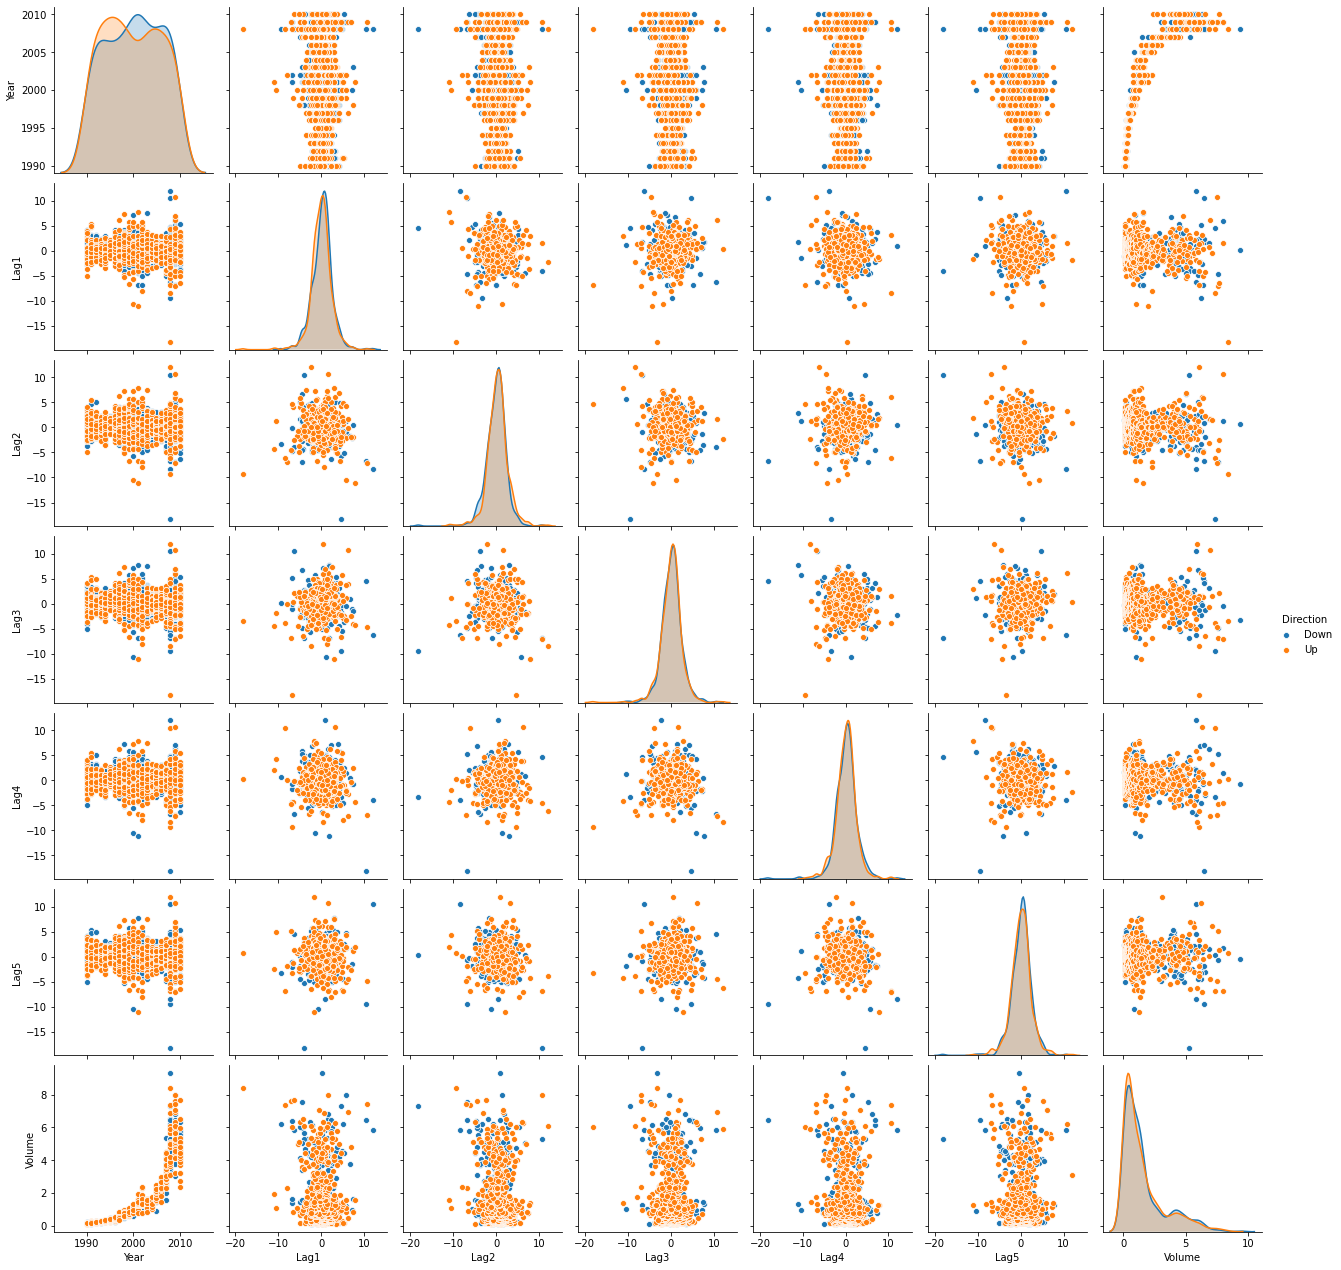

In [3]:
sb.pairplot(data = df, vars = ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], hue = 'Direction')

In [4]:
df.describe() # descriptive statistics

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


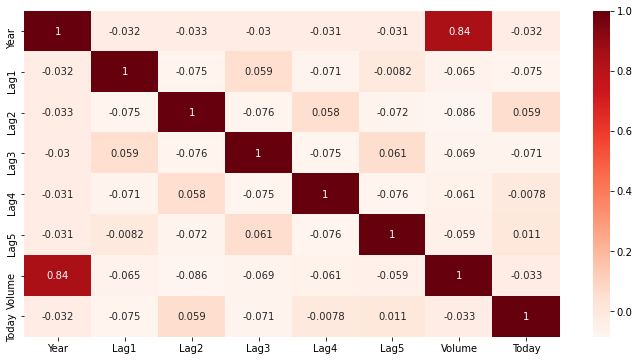

In [5]:
plt.figure(figsize = (12,6))
sb.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.show()

__Observation:__<br>
1.) From the above correlation heatmap we can see that features- __Year__ and __Volume__ are highly correlated

2.) Rest all the features have very less correlation 

____________________________________________________________________

__b.) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results.__

__Do any of the predictors appear to be statistically significant? If so, which ones?__

In [6]:
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
X1 = df.drop(labels = ['Year', 'Today', 'Direction'], axis = 1)
X1 = sm.add_constant(X1, prepend = True)

OE1 = OrdinalEncoder()
y1 = OE1.fit_transform(np.asarray(df['Direction']).reshape(-1, 1)).ravel()
y1.shape

glm1 = sm.GLM(endog = y1, exog = X1, family = sm.families.Binomial())
glm1_result = glm1.fit()
glm1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Mon, 12 Oct 2020   Deviance:                       1486.4
Time:                        13:59:32   Pearson chi2:                 1.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

__Observation__:

1.) Predictors- __Lag1__ is statistically significant, as it has the lower P-value

__c.) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.__

In [7]:
glm1_coeffs = glm1_result.params

In [8]:
y1_pred_proba = glm1_result.predict(exog = X1)
y1_pred = [1 if prob > 0.5 else 0 for prob in y1_pred_proba]

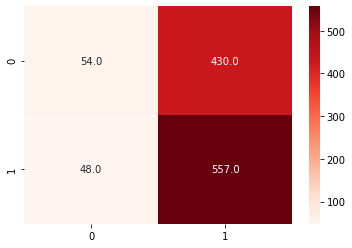

In [9]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y1, y1_pred).ravel()
sb.heatmap(confusion_matrix(y1, y1_pred), annot = True, cmap= 'Reds', fmt = "0.1f")
plt.show()

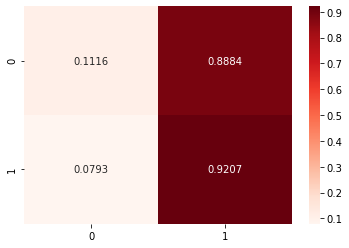

In [10]:
sb.heatmap(confusion_matrix(y1, y1_pred, normalize = 'true'), annot = True, cmap= 'Reds', fmt = "0.4f")
plt.show()

In [11]:
print("Fraction of Correct Predictions: ", (tn+tp)/y1.shape[0])

Fraction of Correct Predictions:  0.5610651974288338


__Observations__:

1.) From the above Confusion Matrix the number of observations out of 1089, which are correctly predicted = 611. That is __56.11%__ of the total 1089 datapoints are correctly predicted

2.) It can also be seen that the number of FP is also very high which is 430. That is __88.84%__ of the Actual Class 0 datapoints are predicted as Class 1 data points, which is an alarming False Positve Rate

3.) Error Rate (percentage Incorrect Prediction) = __43.89%__

4.) False Negative Rate = __7.93%__, ie the total Actual Class 1 datpoints which are incorrectly predicted as Class 0 datapoint

__d.) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010)__

In [12]:
x2_train = df.query("Year <= 2008")['Lag2'].copy()
y2_train = df['Direction'].iloc[x2_train.index]
x2_train = sm.add_constant(x2_train, prepend = 'True')
y2_train = y2_train.map({'Down':0, 'Up': 1})
x2_train

,const,Lag2
0,1.0,1.572
1,1.0,0.816
2,1.0,-0.270
3,1.0,-2.576
4,1.0,3.514
...,...,...
980,1.0,-8.389
981,1.0,12.026
982,1.0,-2.251
983,1.0,0.418


In [13]:
print(x2_train.shape)
print(y2_train.shape)

(985, 2)
(985,)


In [14]:
glm2 = sm.GLM(endog = y2_train, exog = x2_train, family = sm.families.Binomial())
glm2_result = glm2.fit()

In [15]:
x2_test = df[(df['Year'] >= 2009) & (df['Year'] <= 2010)]['Lag2']
y2_test = df['Direction'].iloc[x2_test.index].map({'Down': 0, 'Up': 1})
x2_test = sm.add_constant(x2_test)

print(x2_test.shape)
print(y2_test.shape)

(104, 2)
(104,)


In [16]:
y2_test_pred_proba = glm2_result.predict(x2_test)
y2_test_pred = [1 if prob > 0.5 else 0 for prob in y2_test_pred_proba]

Fraction of correct prediction on test dataset:  0.625


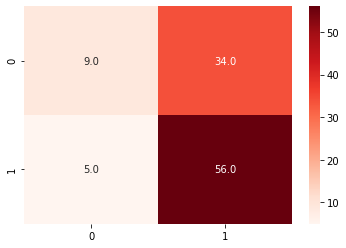

In [17]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_pred).ravel()
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), annot = True, cmap= 'Reds', fmt = "0.1f")
print("Fraction of correct prediction on test dataset: ", (tn+tp)/y2_test.shape[0])
plt.show()

__Observations:__

Fraction of correct prediction on Test dataset, ie. percentage of datapoints which were correctly predicted _(tn+tp)/total datapoints_ = __62.5 %__

__(e) Repeat (d) using LDA__

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x2_train = df.query("Year <= 2008")['Lag2'].copy()
y2_train = df['Direction'].iloc[x2_train.index].map({'Down':0, 'Up': 1})
x2_train = np.asarray(x2_train).reshape(-1, 1)

x2_test = df[(df['Year'] >= 2009) & (df['Year'] <= 2010)]['Lag2'].copy()
y2_test = df['Direction'].iloc[x2_test.index].map({'Down': 0, 'Up': 1})
x2_test = np.asarray(x2_test).reshape(-1, 1)

print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(985, 1)
(985,)
(104, 1)
(104,)


In [19]:
LDA_clf = LDA()
LDA_clf.fit(x2_train, y2_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [20]:
y2_test_pred = LDA_clf.predict(x2_test)

Fraction of correct prediction on test dataset:  0.625


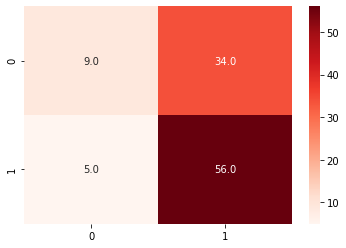

In [21]:
tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_pred).ravel()
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), annot = True, cmap= 'Reds', fmt = "0.1f")
print("Fraction of correct prediction on test dataset: ", (tn+tp)/y2_test.shape[0])
plt.show()

__Observations:__

The overall fraction of correct predictions is __62.5 %__

__(e) Repeat (d) using QDA__

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
QDA_clf = QDA()
QDA_clf.fit(x2_train, y2_train)

y2_test_pred = QDA_clf.predict(x2_test)

Fraction of correct prediction on test dataset:  0.587


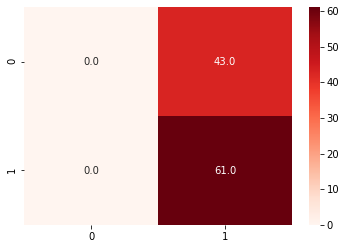

In [23]:
tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_pred).ravel()
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), annot = True, cmap= 'Reds', fmt = "0.1f")
print("Fraction of correct prediction on test dataset: ", round((tn+tp)/y2_test.shape[0], 3))
plt.show()

__(g) Repeat (d) using KNN with K = 1.__

In [24]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_clf = KNN(n_neighbors = 1)
knn_clf.fit(x2_train, y2_train)

y2_test_pred = knn_clf.predict(x2_test)

Fraction of correct prediction on test dataset:  0.49


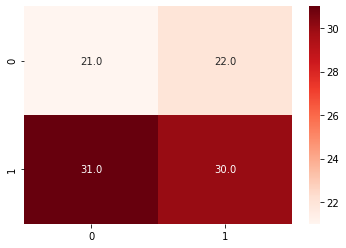

In [25]:
tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_pred).ravel()
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), annot = True, cmap= 'Reds', fmt = "0.1f")
print("Fraction of correct prediction on test dataset: ", round((tn+tp)/y2_test.shape[0], 3))
plt.show()

__(h) Which of these methods appears to provide the best results on this data?__

Ans: LDA and LogisticRegression performs better than QDA and KNN(K = 1) as they both has low Error Rate

In [26]:
x3 = df.drop(labels = ['Direction'], axis = 1)
y3 = df[['Direction']]

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
VIF = [round(vif(x3.values, i), 3) for i in range(x3.shape[1])]
VIF_df = pd.DataFrame({'variables': x3.columns, 'VIF': VIF}).sort_values(by = 'VIF')
VIF_df



,variables,VIF
7,Today,1.019
5,Lag5,1.022
4,Lag4,1.027
1,Lag1,1.028
3,Lag3,1.030
2,Lag2,1.034
6,Volume,1.936
0,Year,1.986


In [27]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.8, stratify = y3)

OE3 = OrdinalEncoder()
y3_train = OE3.fit_transform(y3_train).ravel()
y3_test = OE3.transform(y3_test).ravel()

x3_train

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
929,2007,1.588,2.807,-1.237,0.347,-3.706,3.415362,-2.440
914,2007,2.312,-0.530,1.436,-1.775,-4.899,3.053680,-0.364
182,1993,0.123,0.230,0.303,-0.527,0.509,0.239320,0.325
1065,2010,-1.213,5.416,-5.032,-3.646,2.374,4.487664,3.548
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283
...,...,...,...,...,...,...,...,...
578,2001,-0.062,-0.938,-4.277,-1.006,-2.572,1.070640,-6.720
954,2008,1.777,-3.467,2.670,-1.812,1.149,3.814043,-2.835
1081,2010,3.599,0.015,0.586,0.948,1.650,4.798758,-2.173
894,2007,1.612,-1.062,3.544,-1.133,1.130,2.692797,0.630


In [28]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(n_jobs = -1)
LR_clf.fit(x3_train, y3_train)
y3_train_pred = LR_clf.predict(x3_train)

In [29]:
def ConfMat(y_actual, y_predicted):
    sb.heatmap(data = confusion_matrix(y_actual, y_predicted), annot = True, cmap= 'Reds', fmt = '0.1f')
    plt.plot()
    tn, fp, fn, tp = confusion_matrix(y_actual, y_predicted).ravel()
    ErrorRate = (fn+fp)/y_actual.shape[0]
    
    return ErrorRate

Error Rate on Training dataset:  0.004592422502870264


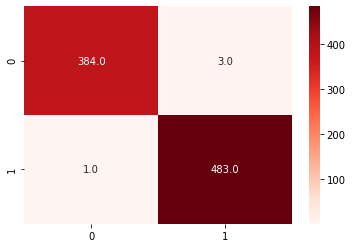

In [30]:
ER_train = ConfMat(y3_train, y3_train_pred)
print("Error Rate on Training dataset: ",ER_train)

Error Rate on Test dataset:  0.0


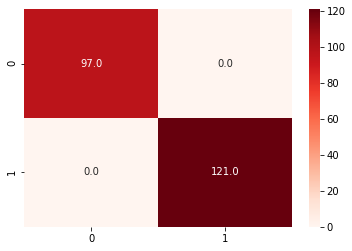

In [31]:
y3_test_pred = LR_clf.predict(x3_test)
ER_test = ConfMat(y3_test, y3_test_pred)
print("Error Rate on Test dataset: ",ER_test)

In [32]:
from sklearn.metrics import matthews_corrcoef as mcc
pd.DataFrame({'Traindata': mcc(y3_train, y3_train_pred), 'Testdata': mcc(y3_test, y3_test_pred)}, index = [0])

,Traindata,Testdata
0,0.990706,1.0


In [33]:
autodf = pd.read_csv(r"D:\PythonProgram\DataScience Programs\SelfPracticeDatasets\ISLRAuto.csv")
autodf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
autodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [35]:
autodf.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [36]:
autodf.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [37]:
autodf['horsepower'].unique()
#autodf['horsepower'] = np.array(autodf['horsepower'], dtype = 'Float64')

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [38]:
indx = autodf[autodf['horsepower'] == '?'].index
autodf.drop(index = indx, axis = 0, inplace = True)

In [39]:
print("Total records with character '?' under 'horsepower' feature are: ", len(indx))

Total records with character '?' under 'horsepower' feature are:  5


In [40]:
autodf['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [41]:
autodf['horsepower'] = np.asarray(autodf['horsepower'], dtype = 'Float64')
print(autodf.info())
autodf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


__(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.__

In [42]:
mpg_med = autodf['mpg'].median()
autodf['mpg01'] = [1 if i >= mpg_med else 0 for i in autodf['mpg']]

In [43]:
autodf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


In [44]:
autodf.mpg01.value_counts()

1    196
0    196
Name: mpg01, dtype: int64

In [45]:
autodf.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [46]:
len(autodf.name.unique())

301

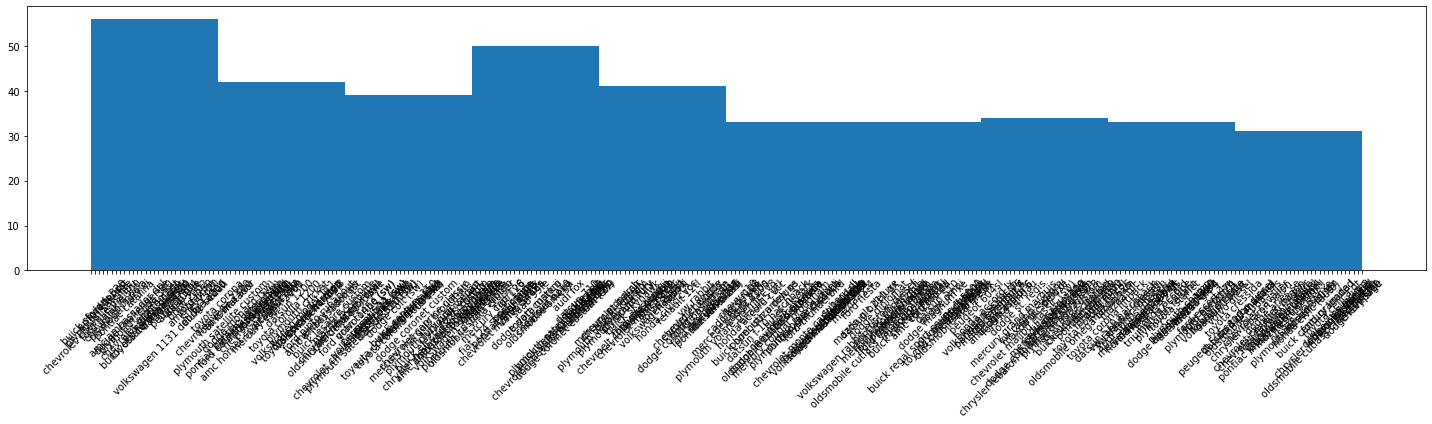

In [62]:
plt.figure(figsize = (20, 6))
plt.hist(autodf['name'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__(b) Explore the data graphically in order to investigate the association between "mpg01" and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.__

In [48]:
def MakeBoxPlot(target, data, predictors):
    
    plt.figure(figsize = (15, 7))
    for fignum, predictor in enumerate(predictors):
        plt.subplot(2, 4, fignum+1)
        sb.boxplot(x = autodf['mpg01'], y = autodf[predictor], hue = autodf['mpg01'], orient = 'v')
        plt.tight_layout(pad = 1.5)
    
    plt.show()

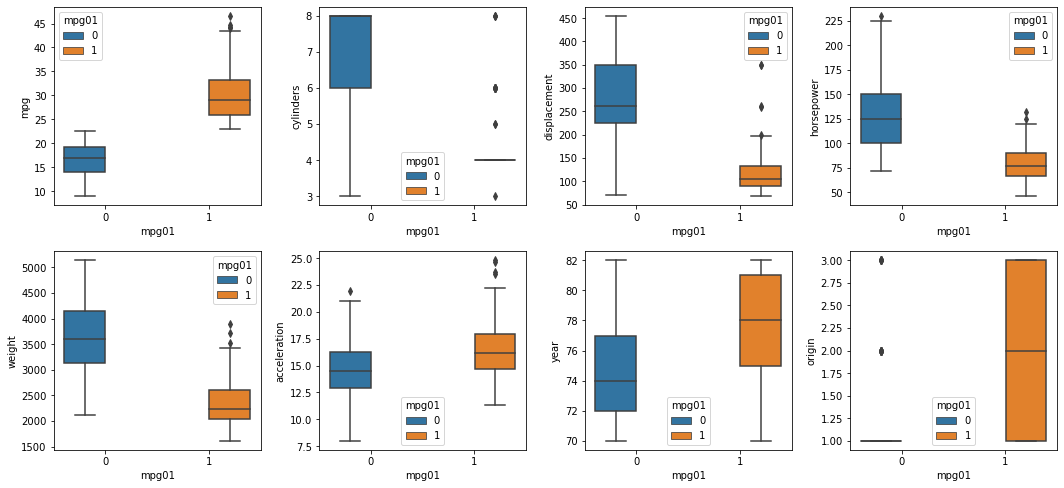

In [49]:
MakeBoxPlot(target = autodf['mpg01'], data = autodf, predictors = ['mpg', 'cylinders', 'displacement', 
                                                                   'horsepower', 'weight','acceleration', 
                                                                   'year', 'origin'])


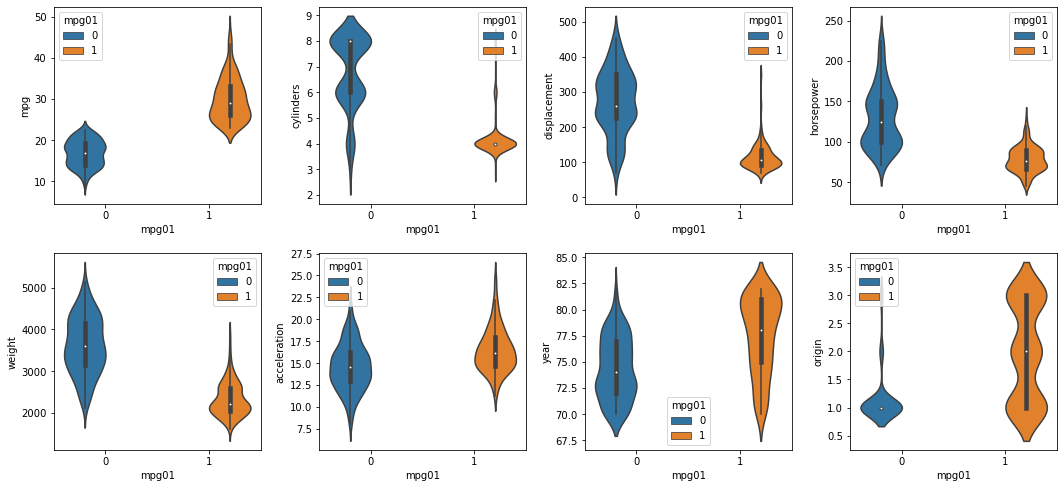

In [56]:
def MakeViolinPlot(target, data, predictors):
    
    plt.figure(figsize = (15, 7))
    for fignum, predictor in enumerate(predictors):
        plt.subplot(2, 4, fignum+1)
        sb.violinplot(x = autodf['mpg01'], y = autodf[predictor], hue = autodf['mpg01'], orient = 'v')
        plt.tight_layout(pad = 1.5)
    
    plt.show()
    
MakeViolinPlot(target = autodf['mpg01'], data = autodf, predictors = ['mpg', 'cylinders', 'displacement', 
                                                                   'horsepower', 'weight','acceleration', 
                                                                   'year', 'origin'])


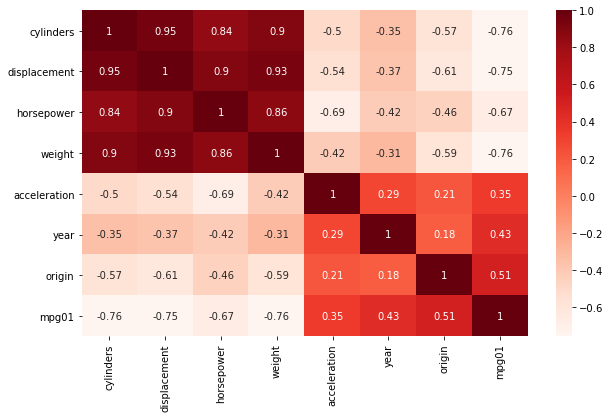

In [65]:
autodf.drop(labels = ['mpg'], inplace = True, axis = 1)
plt.figure(figsize= (10, 6))
sb.heatmap(autodf.corr(), annot = True, cmap = 'Reds')
plt.show()

__Obervation:__

From the above correlation plot we can infer that variable- __'cylinders'__, __'dispalcement'__, __'horsepower'__ and __'weight'__ has a large _negative correlation_ with the response variable __'mpg01'__

__(c) Split the data into a training set and a test set.__

In [93]:
from sklearn.model_selection import train_test_split

X = autodf[['cylinders', 'displacement', 'horsepower','weight']].copy()
y = autodf['mpg01']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

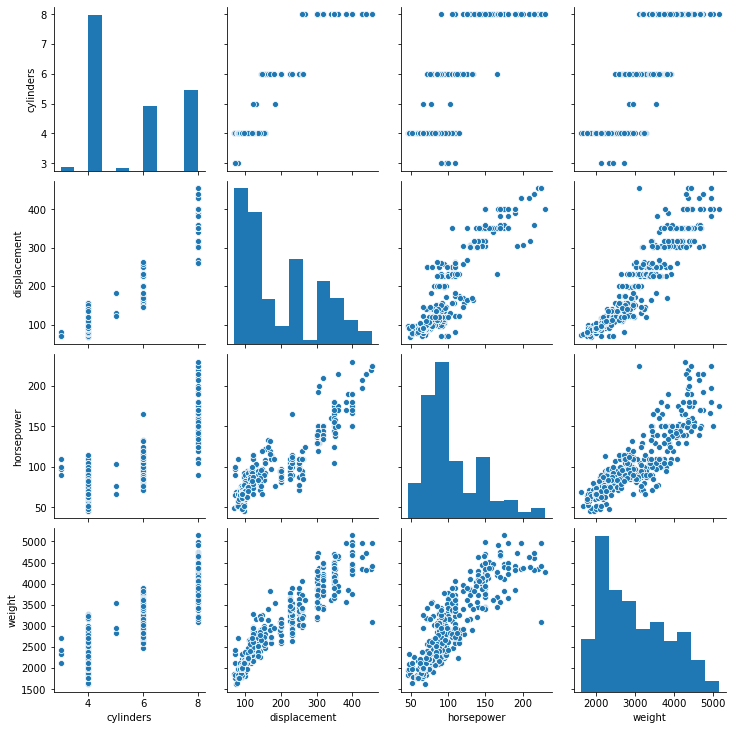

In [89]:
sb.pairplot(X)

In [94]:
print(x_train.shape)
print(y_train.shape)

(313, 4)
(313,)


In [95]:
print(x_test.shape)
print(y_test.shape)

(79, 4)
(79,)


__(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?__

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA_clf = LDA()

In [97]:
LDA_clf.fit(x_train, y_train)
y_train_pred = LDA_clf.predict(x_train)

Training Error Rate using LDA model:  0.11


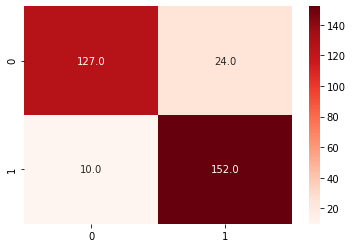

In [98]:
LDA_train_ErrRate = ConfMat(y_train, y_train_pred)
print("Training Error Rate using LDA model: ", round(LDA_train_ErrRate, 2))

In [102]:
print("Matthews Correlation Coefficient on Training data: ", mcc(y_train, y_train_pred))

Matthews Correlation Coefficient on Training data:  0.7849670570056442


In [100]:
y_test_pred = LDA_clf.predict(x_test)

Test Error Rate using LDA model:  0.08


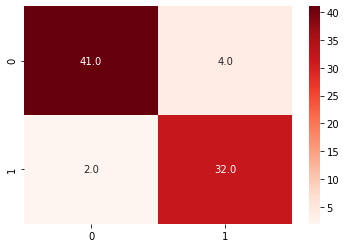

In [101]:
LDA_test_ErrRate = ConfMat(y_test, y_test_pred)
print("Test Error Rate using LDA model: ", round(LDA_test_ErrRate, 2))

In [103]:
print("Matthews Correlation Coefficient on Test Data: ", mcc(y_test, y_test_pred)) 

Matthews Correlation Coefficient on Test Data:  0.8473179324437746


__(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?__

In [105]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
QDA_clf = QDA()
QDA_clf.fit(x_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [108]:
y_train_pred = QDA_clf.predict(x_train)
y_test_pred = QDA_clf.predict(x_test)

Training Error Rate using QDA model:  0.11


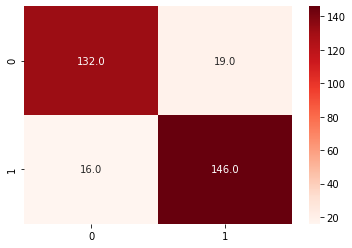

In [112]:
QDA_train_ErrRate = ConfMat(y_train, y_train_pred)
print("Training Error Rate using QDA model: ", round(QDA_train_ErrRate, 2))

In [ ]:
print("Matthews Correlation Coefficient on QDA Train Data: ", mcc(y_train, y_train_pred)) 

Test Error Rate using QDA model:  0.09


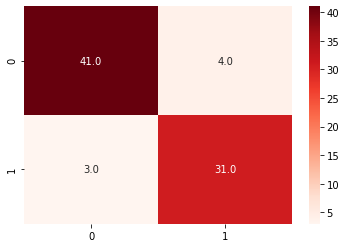

In [111]:
QDA_test_ErrRate = ConfMat(y_test, y_test_pred)
print("Test Error Rate using QDA model: ", round(QDA_test_ErrRate, 2))

In [ ]:
print("Matthews Correlation Coefficient on QDA Test Data: ", mcc(y_test, y_test_pred)) 

__(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?__

In [115]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(x_train, y_train)
y_train_pred = LR_clf.predict(x_train)
y_test_pred = LR_clf.predict(x_test)

Train Error Rate using Logistic Regression model:  0.11


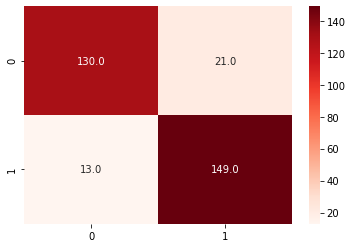

In [116]:
LR_train_ErrRate = ConfMat(y_train, y_train_pred)
print("Train Error Rate using Logistic Regression model: ", round(LR_train_ErrRate, 2))

In [ ]:
print("Matthews Correlation Coefficient on Logistic Regression Train Data: ", mcc(y_train, y_train_pred)) 

Test Error Rate using Logistic Regression model:  0.08


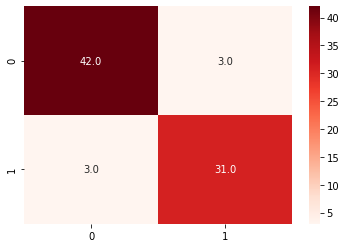

In [117]:
LR_test_ErrRate = ConfMat(y_test, y_test_pred)
print("Test Error Rate using Logistic Regression model: ", round(LR_test_ErrRate, 2))

In [ ]:
print("Matthews Correlation Coefficient on Logistic Regression Test Data: ", mcc(y_test, y_test_pred)) 

__(g) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?__

K =  1
KNN Training Error Rate when K = 1 is: 0.0
Matthews Correlation Coefficient on KNN (K = 1) Train Data: 1.0
KNN Test Error Rate when K = 1 is: 0.11
Matthews Correlation Coefficient on KNN (K = 0.7687337199108691) Test Data: 

----------------------------------------------------------

K =  3
KNN Training Error Rate when K = 3 is: 0.07
Matthews Correlation Coefficient on KNN (K = 3) Train Data: 0.8592510833128935
KNN Test Error Rate when K = 3 is: 0.1
Matthews Correlation Coefficient on KNN (K = 0.7959850208923497) Test Data: 

----------------------------------------------------------

K =  5
KNN Training Error Rate when K = 5 is: 0.09
Matthews Correlation Coefficient on KNN (K = 5) Train Data: 0.8274927158499156
KNN Test Error Rate when K = 5 is: 0.09
Matthews Correlation Coefficient on KNN (K = 0.8201997909896477) Test Data: 

----------------------------------------------------------

K =  6
KNN Training Error Rate when K = 6 is: 0.1
Matthews Correlation Coefficient on KNN (K 

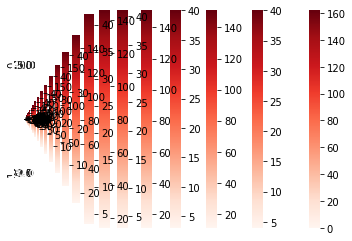

In [137]:
from sklearn.neighbors import KNeighborsClassifier

several_K = [1,3,5,6,7,9,11, 12, 13, 15, 17, 20, 25, 27, 30, 31, 33, 35, 36, 37, 38, 40, 53, 55, 57]
knn_train_errors = []
knn_test_errors = []

for K in several_K:
    print("K = ", K)
    KNN_clf = KNeighborsClassifier(n_neighbors = K, n_jobs = -1)
    KNN_clf.fit(x_train, y_train)
    y_train_pred = KNN_clf.predict(x_train)
    y_test_pred = KNN_clf.predict(x_test)
    KNN_train_ErrRate = ConfMat(y_train, y_train_pred)
    knn_train_errors.append(KNN_train_ErrRate)
    print("KNN Training Error Rate when K = {} is: {}".format(K, round(KNN_train_ErrRate, 2)))
    print("Matthews Correlation Coefficient on KNN (K = {}) Train Data: {}".format(K, mcc(y_train, y_train_pred)))
    KNN_test_ErrRate = ConfMat(y_test, y_test_pred)
    print("KNN Test Error Rate when K = {} is: {}".format(K, round(KNN_test_ErrRate, 2)))
    print("Matthews Correlation Coefficient on KNN (K = {}) Test Data: ".format( mcc(y_test, y_test_pred)))
    knn_test_errors.append(KNN_test_ErrRate)
    print("\n----------------------------------------------------------\n")


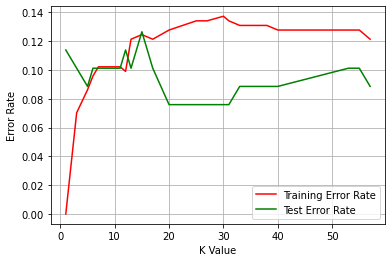

In [138]:
plt.plot(several_K, knn_train_errors, 'r-', label = 'Training Error Rate')
plt.plot(several_K, knn_test_errors, 'g-', label = 'Test Error Rate')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [154]:
knn_train_test_result = pd.DataFrame(columns= ['K', 'TrainError', 'TrainAccuracy', 'TestError', 'TestAccuracy'])
knn_train_test_result['K'] = several_K
knn_train_test_result['TrainError'] = knn_train_errors
knn_train_test_result['TrainAccuracy'] = 1- np.array(knn_train_errors)
knn_train_test_result['TestError'] = knn_test_errors
knn_train_test_result['TestAccuracy'] = 1- np.array(knn_test_errors)

knn_train_test_result.head()

,K,TrainError,TrainAccuracy,TestError,TestAccuracy
0,1,0.000000,1.000000,0.113924,0.886076
1,3,0.070288,0.929712,0.101266,0.898734
2,5,0.086262,0.913738,0.088608,0.911392
3,6,0.095847,0.904153,0.101266,0.898734
4,7,0.102236,0.897764,0.101266,0.898734


In [155]:
knn_train_test_result.sort_values(by = ['TestError'], ascending = True, inplace = True)

In [158]:
knn_train_test_result.head(10)

,K,TrainError,TrainAccuracy,TestError,TestAccuracy
12,25,0.134185,0.865815,0.075949,0.924051
15,31,0.134185,0.865815,0.075949,0.924051
14,30,0.137380,0.862620,0.075949,0.924051
13,27,0.134185,0.865815,0.075949,0.924051
11,20,0.127796,0.872204,0.075949,0.924051
21,40,0.127796,0.872204,0.088608,0.911392
20,38,0.130990,0.869010,0.088608,0.911392
19,37,0.130990,0.869010,0.088608,0.911392
18,36,0.130990,0.869010,0.088608,0.911392
17,35,0.130990,0.869010,0.088608,0.911392


__Observation__

From the above plot we can say that value __K = 25__ is the optimum value, where the __<u>Test Error : 0.076</u>__ which is the lowest